[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 24, number of used features: 0
[LightGBM] [Info] Start training from score 37.234584
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

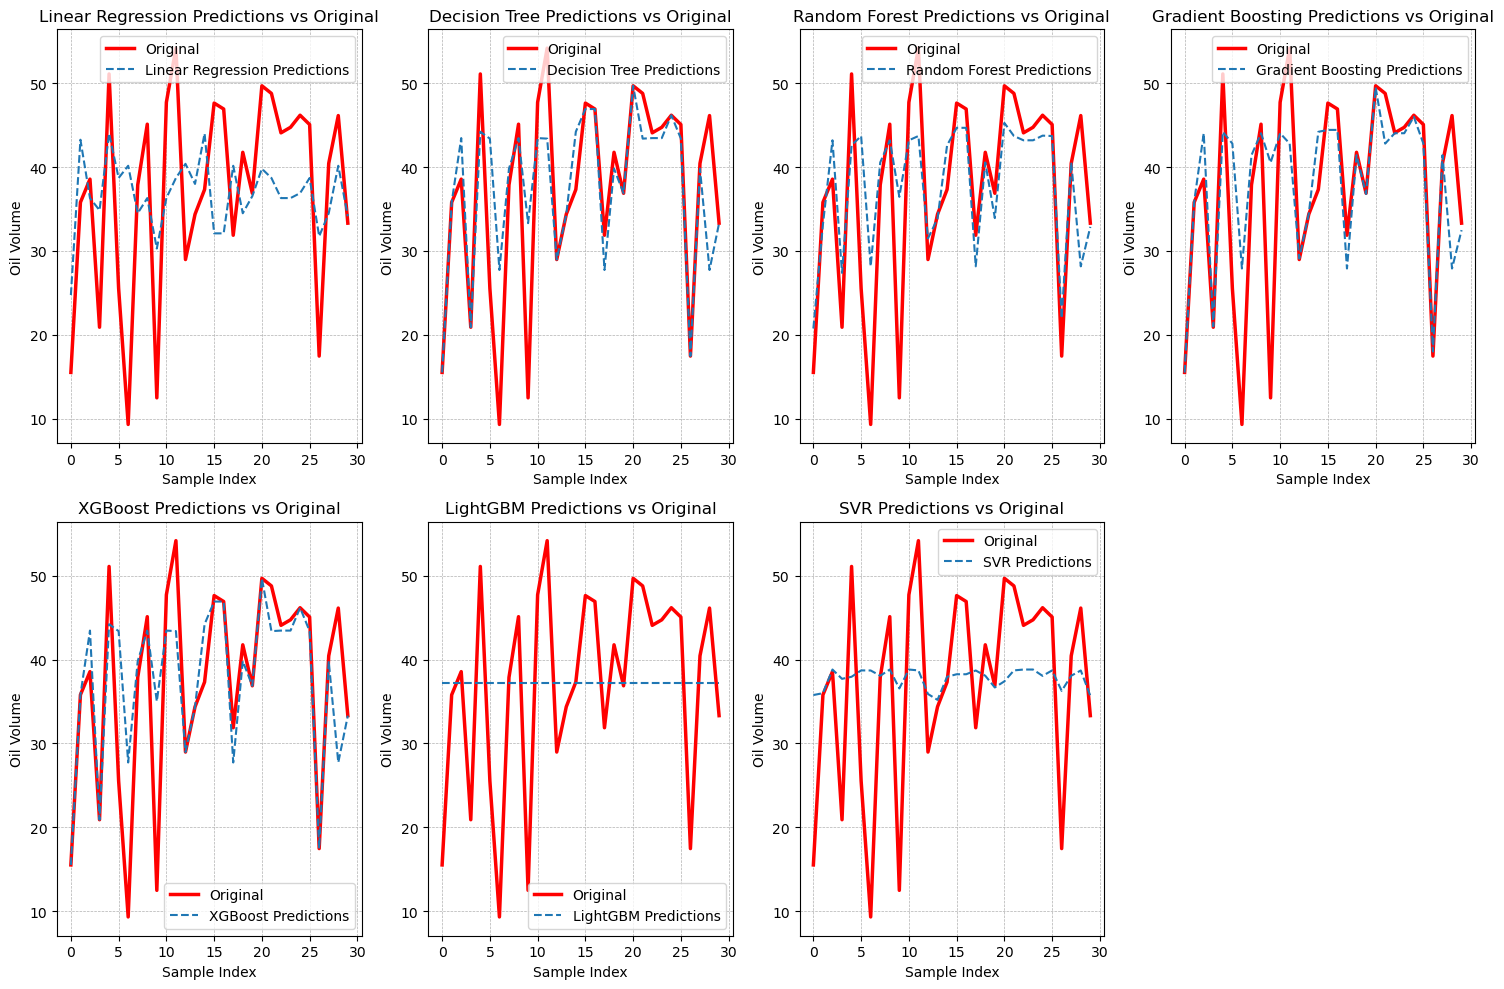

In [25]:
##Semi_Ripe_Plot (Figure 7)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tensorflow import keras
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

# Data
data = {
    'up': [50, 49, 50, 49, 50, 49, 50, 49, 50, 49, 50, 49, 48, 49, 50, 50, 50, 50, 49, 48, 50, 49, 50, 50, 48, 49, 50, 49, 50, 49],
    'mid': [50, 52, 50, 50, 50, 50, 50, 49, 50, 48, 50, 50, 48, 48, 50, 49, 49, 50, 49, 48, 49, 50, 50, 50, 49, 50, 48, 49, 50, 48],
    'low': [53, 51, 50, 51, 48, 50, 49, 50, 50, 50, 50, 50, 48, 48, 48, 50, 50, 49, 50, 49, 48, 50, 50, 50, 50, 50, 49, 50, 49, 49],
    'oil_volume': [15.52, 35.80, 38.57, 20.91, 51.11, 25.54, 9.32, 37.88, 45.12, 12.49, 47.73, 54.19, 28.98, 34.38, 37.33, 47.64, 46.93, 31.88, 41.77, 36.88, 49.70, 48.79, 44.09, 44.75, 46.19, 45.08, 17.47, 40.45, 46.15, 33.32]
}
df = pd.DataFrame(data)

X = df[['up', 'mid', 'low']].values
y = df['oil_volume'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor(),
    "SVR": make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)),
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    results[name] = {'MSE': mse, 'Predictions': y_pred}

# Print MSE results
for name, res in results.items():
    print(f"{name} - MSE: {res['MSE']}")

# Save results to a CSV
all_predictions = {}
for name, res in results.items():
    all_predictions[name] = res['Predictions']

df_predictions = pd.DataFrame(all_predictions)
df_predictions.to_csv("Sem_Volume_Predictions.csv", index=False)

# Create subplots for predictions vs. original values
num_models = len(results)
num_cols = 4  # Number of columns for subplots
num_rows = -(-num_models // num_cols)  # Ceiling division to determine number of rows

plt.figure(figsize=(15, 5 * num_rows))

for idx, (name, res) in enumerate(results.items(), start=1):
    plt.subplot(num_rows, num_cols, idx)

    plt.plot(y, label="Original", color='red', linewidth=2.5)
    plt.plot(res['Predictions'], label=name + " Predictions", linestyle='dashed')

    plt.title(f'{name} Predictions vs Original')
    plt.xlabel('Sample Index')
    plt.ylabel('Oil Volume')
    plt.legend()
    plt.tight_layout()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display all subplots at once
plt.show()

In [26]:
##Semi_Ripe_Results (Table 3)

# import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tensorflow import keras
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt  # <-- Added this import

# Data
# Data
data = {
    'up': [50, 49, 50, 49, 50, 49, 50, 49, 50, 49, 50, 49, 48, 49, 50, 50, 50, 50, 49, 48, 50, 49, 50, 50, 48, 49, 50, 49, 50, 49],
    'mid': [50, 52, 50, 50, 50, 50, 50, 49, 50, 48, 50, 50, 48, 48, 50, 49, 49, 50, 49, 48, 49, 50, 50, 50, 49, 50, 48, 49, 50, 48],
    'low': [53, 51, 50, 51, 48, 50, 49, 50, 50, 50, 50, 50, 48, 48, 48, 50, 50, 49, 50, 49, 48, 50, 50, 50, 50, 50, 49, 50, 49, 49],
    'oil_volume': [15.52, 35.80, 38.57, 20.91, 51.11, 25.54, 9.32, 37.88, 45.12, 12.49, 47.73, 54.19, 28.98, 34.38, 37.33, 47.64, 46.93, 31.88, 41.77, 36.88, 49.70, 48.79, 44.09, 44.75, 46.19, 45.08, 17.47, 40.45, 46.15, 33.32]
}
df = pd.DataFrame(data)

X = df[['up', 'mid', 'low']].values
y = df['oil_volume'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
# Models (including Gradient Boosting, XGBoost, and LightGBM)
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor(),
    "SVR": make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)),
    "KNN": KNeighborsRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X)
    
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)  # Compute MAE
    r2 = r2_score(y, y_pred)  # Compute R^2
    
    results[name] = {'MSE': mse, 'MAE': mae, 'R^2': r2, 'Predictions': y_pred}  # Store the metrics

# Simple Neural Network using TensorFlow/Keras
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=200, verbose=0)
y_pred = model.predict(X).flatten()

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)  # Compute MAE for neural network
r2 = r2_score(y, y_pred)  # Compute R^2 for neural network

results['Neural Network'] = {'MSE': mse, 'MAE': mae, 'R^2': r2, 'Predictions': y_pred}  # Store the metrics

# Print MSE, MAE, and R^2 results
for name, res in results.items():
    print(f"{name} - MSE: {res['MSE']}, MAE: {res['MAE']}, R^2: {res['R^2']}")

# Save results to a CSV
all_predictions = {}
for name, res in results.items():
    all_predictions[name] = res['Predictions']

df_predictions = pd.DataFrame(all_predictions)
df_predictions.to_csv("Sem_Volume_Predictions.csv", index=False)

# Prepare data for CSV
results_for_csv = {
    'Model': [],
    'MSE': [],
    'MAE': [],
    'R^2': []
}

for name, res in results.items():
    results_for_csv['Model'].append(name)
    results_for_csv['MSE'].append(res['MSE'])
    results_for_csv['MAE'].append(res['MAE'])
    results_for_csv['R^2'].append(res['R^2'])

# Convert to DataFrame
df_results = pd.DataFrame(results_for_csv)

# Save to CSV
df_results.to_csv("HafResults.csv", index=False)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 24, number of used features: 0
[LightGBM] [Info] Start training from score 37.234584
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

1/1 [==============================] - 0s 74ms/step
Linear Regression - MSE: 126.55359464180746, MAE: 9.59263651905496, R^2: 0.1130931054179547
Decision Tree - MSE: 58.230649074074066, MAE: 4.308666666666667, R^2: 0.5919107293162362
Random Forest - MSE: 69.12428523169078, MAE: 5.628285571428569, R^2: 0.5155664655076541
Gradient Boosting - MSE: 70.69095240822733, MAE: 4.775707623822391, R^2: 0.5045870229693492
XGBoost - MSE: 60.70340192195783, MAE: 4.3661283798217765, R^2: 0.5745813001870774
LightGBM - MSE: 142.6922482494901, MAE: 9.58574994341532, R^2: -9.04070786211797e-06
SVR - MSE: 131.86180903734743, MAE: 8.812089272730244, R^2: 0.07589232926735145
KNN - MSE: 118.26692320000001, MAE: 7.5912000000000015, R^2: 0.17116736285550083
Neural Network - MSE: 140.72566022479572, MAE: 9.524646952311196, R^2: 0.013773108134615075


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 24, number of used features: 0
[LightGBM] [Info] Start training from score 36.949167
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

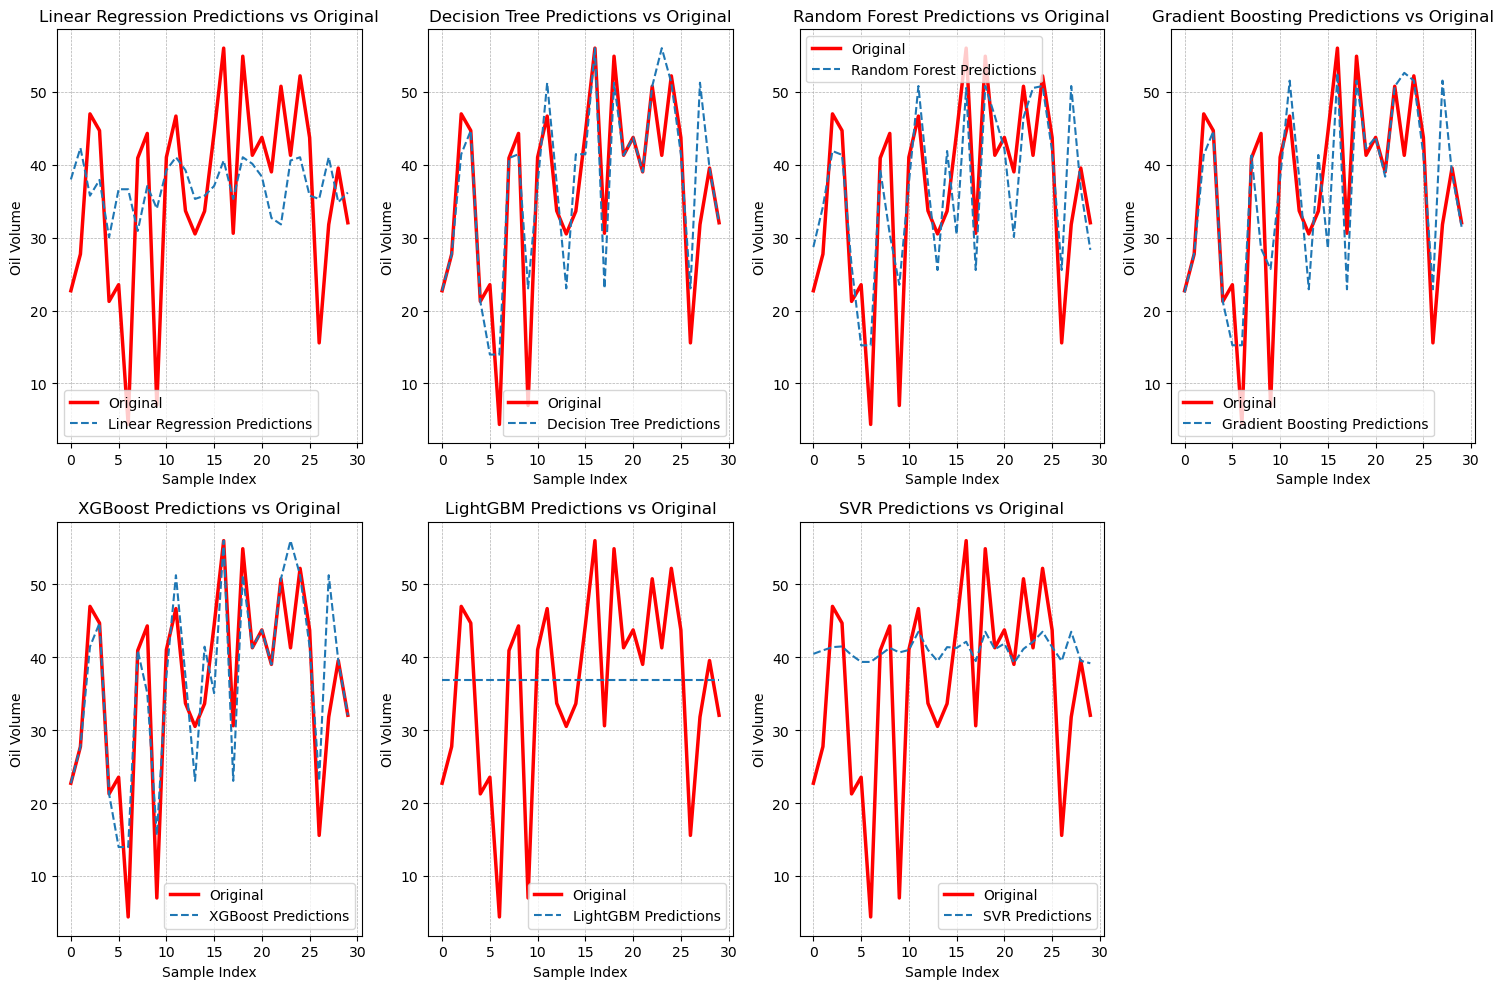

In [27]:
##Unripe_Plot (Figure 8)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tensorflow import keras
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

# Data
data = {
    'up': [50, 48, 49, 48, 48, 50, 50, 49, 50, 48, 49, 50, 49, 49, 49, 50, 50, 49, 50, 50, 48, 50, 49, 50, 50, 49, 49, 50, 49, 50],
    'mid': [49, 51, 49, 50, 48, 49, 49, 48, 49, 49, 50, 50, 50, 49, 49, 49, 50, 49, 50, 50, 50, 48, 48, 50, 50, 49, 49, 50, 49, 49],
    'low': [52, 50, 50, 49, 49, 49, 49, 48, 50, 49, 49, 50, 49, 49, 50, 50, 49, 49, 50, 48, 50, 49, 50, 49, 50, 50, 49, 50, 48, 48],
    'oil_volume': [22.72, 27.75, 46.99, 44.70, 21.26, 23.55, 4.38, 40.93, 44.31, 6.98, 41.04, 46.69, 33.69, 30.52, 33.64, 44.41, 56.01, 30.61, 54.90, 41.31, 43.76, 39.03, 50.78, 41.30, 52.21, 43.74, 15.57, 31.81, 39.56, 32.05]
}
df = pd.DataFrame(data)

X = df[['up', 'mid', 'low']].values
y = df['oil_volume'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor(),
    "SVR": make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)),
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    results[name] = {'MSE': mse, 'Predictions': y_pred}

# Print MSE results
for name, res in results.items():
    print(f"{name} - MSE: {res['MSE']}")

# Save results to a CSV
all_predictions = {}
for name, res in results.items():
    all_predictions[name] = res['Predictions']

df_predictions = pd.DataFrame(all_predictions)
df_predictions.to_csv("Un_Volume_Predictions.csv", index=False)

# Create subplots for predictions vs. original values
num_models = len(results)
num_cols = 4  # Number of columns for subplots
num_rows = -(-num_models // num_cols)  # Ceiling division to determine number of rows

plt.figure(figsize=(15, 5 * num_rows))

for idx, (name, res) in enumerate(results.items(), start=1):
    plt.subplot(num_rows, num_cols, idx)

    plt.plot(y, label="Original", color='red', linewidth=2.5)
    plt.plot(res['Predictions'], label=name + " Predictions", linestyle='dashed')

    plt.title(f'{name} Predictions vs Original')
    plt.xlabel('Sample Index')
    plt.ylabel('Oil Volume')
    plt.legend()
    plt.tight_layout()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display all subplots at once
plt.show()

In [28]:
##UnRipe_Result (Table 3)

# import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tensorflow import keras
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt  # <-- Added this import

# Data
# Data
data = {
    'up': [50, 48, 49, 48, 48, 50, 50, 49, 50, 48, 49, 50, 49, 49, 49, 50, 50, 49, 50, 50, 48, 50, 49, 50, 50, 49, 49, 50, 49, 50],
    'mid': [49, 51, 49, 50, 48, 49, 49, 48, 49, 49, 50, 50, 50, 49, 49, 49, 50, 49, 50, 50, 50, 48, 48, 50, 50, 49, 49, 50, 49, 49],
    'low': [52, 50, 50, 49, 49, 49, 49, 48, 50, 49, 49, 50, 49, 49, 50, 50, 49, 49, 50, 48, 50, 49, 50, 49, 50, 50, 49, 50, 48, 48],
    'oil_volume': [22.72, 27.75, 46.99, 44.70, 21.26, 23.55, 4.38, 40.93, 44.31, 6.98, 41.04, 46.69, 33.69, 30.52, 33.64, 44.41, 56.01, 30.61, 54.90, 41.31, 43.76, 39.03, 50.78, 41.30, 52.21, 43.74, 15.57, 31.81, 39.56, 32.05]
}
df = pd.DataFrame(data)

X = df[['up', 'mid', 'low']].values
y = df['oil_volume'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
# Models (including Gradient Boosting, XGBoost, and LightGBM)
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor(),
    "SVR": make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)),
    "KNN": KNeighborsRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X)
    
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)  # Compute MAE
    r2 = r2_score(y, y_pred)  # Compute R^2
    
    results[name] = {'MSE': mse, 'MAE': mae, 'R^2': r2, 'Predictions': y_pred}  # Store the metrics

# Simple Neural Network using TensorFlow/Keras
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=200, verbose=0)
y_pred = model.predict(X).flatten()

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)  # Compute MAE for neural network
r2 = r2_score(y, y_pred)  # Compute R^2 for neural network

results['Neural Network'] = {'MSE': mse, 'MAE': mae, 'R^2': r2, 'Predictions': y_pred}  # Store the metrics

# Print MSE, MAE, and R^2 results
for name, res in results.items():
    print(f"{name} - MSE: {res['MSE']}, MAE: {res['MAE']}, R^2: {res['R^2']}")

# Save results to a CSV
all_predictions = {}
for name, res in results.items():
    all_predictions[name] = res['Predictions']

df_predictions = pd.DataFrame(all_predictions)
df_predictions.to_csv("Un_Volume_Predictions.csv", index=False)

# Prepare data for CSV
results_for_csv = {
    'Model': [],
    'MSE': [],
    'MAE': [],
    'R^2': []
}

for name, res in results.items():
    results_for_csv['Model'].append(name)
    results_for_csv['MSE'].append(res['MSE'])
    results_for_csv['MAE'].append(res['MAE'])
    results_for_csv['R^2'].append(res['R^2'])

# Convert to DataFrame
df_results = pd.DataFrame(results_for_csv)

# Save to CSV
df_results.to_csv("UnripeResults.csv", index=False)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 24, number of used features: 0
[LightGBM] [Info] Start training from score 36.949167
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

1/1 [==============================] - 0s 86ms/step
Linear Regression - MSE: 150.69576184422823, MAE: 9.897998063945133, R^2: 0.08023569374107187
Decision Tree - MSE: 46.05328666666667, MAE: 4.328666666666667, R^2: 0.7189159884556331
Random Forest - MSE: 66.12668236467087, MAE: 6.638826460317464, R^2: 0.5963989870317943
Gradient Boosting - MSE: 59.88101773289693, MAE: 5.29481896560389, R^2: 0.6345190995476825
XGBoost - MSE: 45.09344464198011, MAE: 4.505379534403485, R^2: 0.7247743379085299
LightGBM - MSE: 164.39302167101596, MAE: 10.31144445652432, R^2: -0.0033648702565827193
SVR - MSE: 168.85364061289417, MAE: 9.2666425820818, R^2: -0.03059004259290199
KNN - MSE: 103.0116308, MAE: 7.823666666666665, R^2: 0.37127348520059444
Neural Network - MSE: 160.96094484537323, MAE: 10.292457092285156, R^2: 0.017582644935169478
